# Packages

In [1]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [3]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [4]:
%%R
install.packages("sampling")
library(sampling)

* installing *source* package ‘sampling’ ...
** package ‘sampling’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’
installing to /home/divar/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sampling/00new/sampling/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c str.c -o str.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -Wl,-z,relro -o sampling.so init.o str.o -L/usr/lib/R/lib -lR


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sampling)


Installing package into ‘/home/divar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/sampling_2.10.tar.gz'
Content type 'application/x-gzip' length 574173 bytes (560 KB)
downloaded 560 KB


The downloaded source packages are in
	‘/tmp/Rtmp7HYmcE/downloaded_packages’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/local/lib/R/site-library’ contains no packages


In [5]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages



0.6984152962884828
0.9421664139113467
[1] 0.9750693


In [6]:
%%R
swiss_big = 0
swiss_small = 0
if (swiss_big == 1){
# Swiss
data(swissmunicipalities)
y2 = swissmunicipalities$Airbat
x2 = swissmunicipalities$Pop020
v2 = swissmunicipalities$Airind
h2 = swissmunicipalities$H00P01
w2 = swissmunicipalities$H00P04
N = length(y2)
n_percent = .05
n = round(n_percent * N)
n = 10


#1 Great
y <- y2; z <- x2; p <- h2

}


if (swiss_small == 1){
# Swiss
print(cor(swiss))
x1 = -swiss$Education
y1 = -swiss$Examination
h1 = swiss$Agriculture
N = length(y1)
n_percent = .05
n = round(n_percent * N)
n = 5


#1 Great
y <- y1; z <- x1; p <- h1

}


# Simu The best

## R Popu

In [7]:
%%R

library(sampling)

#MU284 Sweden
data(MU284)
MU284 = MU284[MU284$P85<200,]
set.seed(120)
MU284 = MU284[sample(length(MU284[,1])),]
#MU284 = MU284[order(-MU284$ME84),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


RMT85 = MU284$RMT85
P85 = MU284$P85/100
P75 = MU284$P75/100
S82 = MU284$S82/1000
ME84 = MU284$ME84/1000
REV84 = MU284$REV84/1000
REG = MU284$REG

N = length(REV84)
n = 14
r <- runif(N, .1, .8)
e <- rep (1, N)




y <- P85; z <- ME84 ; p <- P75 # be rahe!
y <- P85; z <- ME84 ; p <- S82
# y <- P85; z <- ME84 ; p <- REG
# y <- P85; z <- ME84 ; p <- e 


# y <- P85; z <- REV84; p <- P75 # be rahe!
# y <- P85; z <- REV84; p <- S82
# y <- P85; z <- REV84; p <- REG
# y <- P85; z <- REV84; p <- e 


pik <- inclusionprobabilities(p, n)
pik[pik>1] = 1
pik[pik==0] = 1e-4

print(c(N, n))
##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



#################################
############ Plots and Prints ###
#################################
if(1==0){
  par(mfrow=c(2,3))
  plot(y, z)
  plot(p, z)
  plot(p, y)
  
  plot(z_hat, y_hat)
  plot(p/pik, y_hat)
  
  plot(p/pik, z_hat)
  par(mfrow=c(2,3))
#cat('x,y', cor(x,y), '\n x,z', cor(z, x), '\n y,z', cor(z, y), "\n")
plot(y, z)
plot(p,z)
plot(p,y)

plot(z_hat,y_hat)
plot(p/pik,y_hat)

plot(p/pik,z_hat)


cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(p,z), "z_NHT, y_NHT", cor(z/pik,y/pik))

z_hat = z/pik
print(var_z)
print(var_y)
cat("x threshold", threshold_z, "\n", "y threshold", threshold_y, "\n")


#cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(x,z), "z_NHT, y_NHT", cor(z/pik,y/pik))
Final_result = cbind(y,z, y_hat, z_hat, pik, abs((y_hat- z_hat)/y_hat))

print(c(N,n))

}


[1] 281  14


In [8]:
%%R
M = 1000

cube_estimatieon_z = array(0, M)
cube_estimatieon_y = array(0, M)

for(m in 1:M) {
    cube_sample = samplecube(cbind(pik,z), pik, comment=FALSE)
    cube_estimatieon_z[m] = sum(z[cube_sample==1]/pik[cube_sample==1])
    cube_estimatieon_y[m] = sum(y[cube_sample==1]/pik[cube_sample==1])


}
var__cub_y = round(var(cube_estimatieon_y), 2)
var__cub_z = round(var(cube_estimatieon_z), 2)

var_y_0 = c(var__cub_y, var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('cubzy', 'syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__cub_z, var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('cubz', 'sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0[-1])
threshold_y = min(var_y_0[-1])
cat('cor x,y', round(cor(p, y),3), 'cor x,z', round(cor(p, z),3),'cor y,z', round(cor(y, z),3), '\n')
print(round(var_y_0, 2))
print(round(var_z_0, 2))
cat('cube eff z and y:        ', c(round(min(var_z_0[-1])/var_z_0['cubz'], 2),round(min(var_y_0[-1])/var_y_0['cubzy'], 2)), '\n')


cor x,y 0.865 cor x,z 0.855 cor y,z 0.988 
 cubzy  syszy  maxzy  midzy  tilzy  srszy 
 21.27 199.67 154.92 130.92 154.30 310.91 
    cubz     sysz     maxz     midz     tilz     srsz 
  641.21  7119.61  6024.47  5085.60  6000.73 11520.91 
cube eff z and y:         7.93 6.15 


## Astar

In [ ]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])

n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])

inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)


max_open_set_size      = 20000
switch_coefficient     = .5
num_initial_nodes      = 2000
initial_design_to_use  = 1
show_results           = 1
max_iterations         = 10000
random_restart_period  = 100   # how often to inject random designs
random_injection_count = 10    # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = .01



import numpy as np
rng = np.random.default_rng()  # define your random generator here if you want

for num_changes in [10]:
    for num_new_nodes in [10]:
        print(max_iterations, num_new_nodes, max_open_set_size, num_changes, switch_coefficient)
        # If you want a random permutation for the classic case
        criterion = VarNHT(main_variable=y, auxiliary_variable=z, inclusion_probability=inclusions)
        astar = AStar(
            inclusions=inclusions, 
            num_initial_nodes=num_initial_nodes,
            initial_design_to_use=initial_design_to_use,
            criteria=criterion,
            z = z,
            y = y,
            threshold_z=threshold_z,
            threshold_y=threshold_y,
            switch_coefficient=switch_coefficient, 
            show_results=show_results, 
            var_percent_exected=var_percent_exected
        )
        result = astar.run(
            max_iterations=max_iterations,
            num_new_nodes=num_new_nodes,
            max_open_set_size=max_open_set_size,
            num_changes=num_changes,
            random_restart_period=random_restart_period,
            random_injection_count=random_injection_count,
            prune_fraction=prune_fraction
        )
        print("Best criteria value:", astar.best_criteria_value)
        print("Iterations run:", result)
        print(np.round(var_z_0, 1))
        print(np.round(var_y_0, 1))
        astar.initial_design.show()
        astar.best_design.show()

## Survey Metothology design requests


In [9]:
%%R
# --- Mahalanobis distance: for a single variable, this is just the Z-score-squared! ---
center <- mean(z)
var_z <- var(z)
mahal <- (z - center)^2 / var_z

# Sort by decreasing Mahalanobis distance
ix <- order(mahal, decreasing = TRUE)
z_sorted <- z[ix]
pik_sorted <- pik[ix]
y_sorted <- y[ix]
X_sorted <- matrix(z_sorted, ncol=1)

# --- Apply fast flight phase of the cube method on sorted data ---
# (cube expects a matrix for X)
M = 1000

cube_estimatieon_z = array(0, M)
cube_estimatieon_y = array(0, M)

for(m in 1:M) {
    cube_sample <- samplecube(pik_sorted, X_sorted, comment=FALSE)
    cube_estimatieon_z[m] = sum(z_sorted[cube_sample==1]/pik_sorted[cube_sample==1])
    cube_estimatieon_y[m] = sum(y_sorted[cube_sample==1]/pik_sorted[cube_sample==1])


}
var__cub_y = round(var(cube_estimatieon_y), 2)
var__cub_z = round(var(cube_estimatieon_z), 2)
print(var__cub_y)
print(var__cub_z)

[1] 59.35
[1] 1542.92


In [ ]:
from dppy.finite_dpps import FiniteDPP
import numpy as np

N = 100
rank = 15
# Random projection kernel: rank=rank
U = np.random.randn(N, rank)
K = U @ np.linalg.pinv(U)

dpp = FiniteDPP('correlation', {'K': K})
sample = dpp.sample_exact()
print("Sample size:", len(sample))
print("Sampled indices:", sample)

AttributeError: 'FiniteDPP' object has no attribute 'is_projection'

### Vincent Loonis Method

In [ ]:
import numpy as np
from dppy.finite_dpps import FiniteDPP

np.random.seed(123)

N = 100
n_expected = 15
# 2. Data
pik = np.random.uniform(0.05, 0.2, N)
pik = pik * n_expected / np.sum(pik)  # Normalize for expected sample size

z = np.random.uniform(5, 15, N)
y = 2 * z + np.random.randn(N)

# ---------------------
# 3. Kernel construction
# There is no direct Herzberger implementation in Python.
# We'll use a simple projection kernel for demonstration.
# Please note: this does NOT ensure K.diag()==pik exactly.
# For real Herzberger, you'd need to code an SDP (optimization) or use R.
X = np.column_stack((np.ones(N), z))  # auxiliary matrix
X = X / np.linalg.norm(X, axis=0)     # normalize columns

# K = X (X^T X)^{-1} X^T   (rank ~ columns of X)
XXt = X @ np.linalg.pinv(X.T @ X) @ X.T
# Rescale K to have trace = sum(pik)
eigvals, eigvecs = np.linalg.eigh(XXt)
idx = eigvals.argsort()[::-1]
eigvals_proj = np.zeros_like(eigvals)
eigvals_proj[:int(round(np.sum(pik)))] = 1  # make it "projection" kernel of desired rank

K = (eigvecs[:, idx] @ np.diag(eigvals_proj) @ eigvecs[:, idx].T).real

# ---------------------
# 4. Sample selection (via DPP)
dpp = FiniteDPP('correlation', **{'K': K})
s = dpp.sample_exact()  # indices of selected units
sample_indices = np.array(s)
print("Selected units:", sample_indices)

# ---------------------
# 5. Compute NHT estimators and variance

pi_i = np.diag(K)
N_mat = np.arange(N)
pi_ij = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            pi_ij[i, j] = pi_i[i]
        else:
            pi_ij[i, j] = pi_i[i] + pi_i[j] - np.abs(K[i,j])**2

def nht_est_var(v, s, pi_i, pi_ij):
    est = np.sum(v[s] / pi_i[s])
    vt = np.outer(v/pi_i, v/pi_i)
    variance = np.sum((pi_ij - np.outer(pi_i, pi_i)) * vt)
    return {'estimate': est, 'variance': variance}

result_z = nht_est_var(z, sample_indices, pi_i, pi_ij)
result_y = nht_est_var(y, sample_indices, pi_i, pi_ij)

print("NHT estimate for z: %.3f" % result_z['estimate'])
print("NHT theoretical variance for z: %.5f" % result_z['variance'])
print("NHT estimate for y: %.3f" % result_y['estimate'])
print("NHT theoretical variance for y: %.5f" % result_y['variance'])

# ---------------------
# 6. Monte Carlo simulation for empirical variance
m = 1000
nht_zs = np.zeros(m)
nht_ys = np.zeros(m)
np.random.seed(1234)
for j in range(m):
    dpp = FiniteDPP('correlation', {'K': K})
    s = dpp.sample_exact()
    nht_zs[j] = np.sum(z[s] / pi_i[s])
    nht_ys[j] = np.sum(y[s] / pi_i[s])

print("MC empirical variance for z:", np.var(nht_zs))
print("MC empirical variance for y:", np.var(nht_ys))

In [10]:
%%R
# 1. Source needed scripts (adjust the path if needed)
source("/home/divar/projects/Determinantal-Sampling-Designs/Ppi")
source("/home/divar/projects/Determinantal-Sampling-Designs/Drawing_Dsd")

# 2. Construct the kernel
# Let's simulate some inclusion probabilities for N units:

# Build the eigenbasis for the kernel
Phi <- Ppi(pik)
K <- Phi %*% t(Phi)

# OR: Depending on your needs, use another script/function to build K.

# 3. Set up your variable of interest
y <- rnorm(N)

# 4. Monte Carlo sampling and NHT estimation
m <- 10     # number of replications
estimates <- numeric(m)

for (i in 1:m) {
  print(i)
  # Draw one sample (Drawing_Dsd expects the kernel eigenbasis as input)
  s <- Drawing_Dsd(Phi, s = N, B = TRUE)
  # s is an N x 1 logical or indicator vector (see readme for format)
  sel <- as.logical(s)
  print(sel)
  estimates[i] <- sum(y[sel] / pik[sel])
}

# 5. Estimate variance
nht_var_estimate <- var(estimates)
cat("Empirical variance of NHT estimator from Monte Carlo:", nht_var_estimate, "\n")
cat("Monte Carlo mean of estimator:", mean(estimates), "\n")
cat("Actual total of y:", sum(y), "\n")

 [1]  20  42  64  84 104 124 141 161 181 201 223 244 261 281
 [1]  20  42  64  84 104 124 141 161 181 201 223 244 261 281
[1] 1
    [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

Exception ignored from cffi callback <function _consolewrite_ex at 0x75107101a8e0>:
Traceback (most recent call last):
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 140, in _consolewrite_ex
    consolewrite_print(s)
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 122, in consolewrite_print
    print(s, end='', flush=True)
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/ipykernel/iostream.py", line 609, in flush
    if not evt.wait(self.flush_timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/threading.py", line 655, in wait
    signaled = self._cond.wait(timeout)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/threading.py", line 359, in wait
    gotit = waiter.acquire(True, timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 



[53005] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53017] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53029] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53041] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[53053] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[53065] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53077] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53089] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[53101] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53113] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[53125] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[53137] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[53149] FALSE FALSE FALSE FALSE FALSE F

In [17]:
%%R
source("/home/divar/projects/Determinantal-Sampling-Designs/Ppi")
K <- Herzberger(pik)
print(K)

Error in Herzberger(pik) : could not find function "Herzberger"


RInterpreterError: Failed to parse and evaluate line 'source("/home/divar/projects/Determinantal-Sampling-Designs/Ppi")\nK <- Herzberger(pik)\nprint(K)\n'.
R error message: 'Error in Herzberger(pik) : could not find function "Herzberger"'

In [ ]:
%%R


# 2. Data
set.seed(123)

# 3. Kernel construction
K <- Herzberger(pik)

# 4. Sample selection
s <- bernoulli.dsd(K)
sample_indices <- which(s)
cat("Selected units:", sample_indices, "\n")

# 5. Compute NHT estimators and variance
pi_i <- diag(K)
pi_ij <- outer(1:N, 1:N,
               Vectorize(function(i,j)
                 if(i == j) pi_i[i] else pi_i[i] + pi_i[j] - abs(K[i,j])^2))

nht_est_var <- function(v, s, pi_i, pi_ij) {
  est <- sum(v[s] / pi_i[s])
  vt <- outer(v/pi_i, v/pi_i)
  variance <- sum( (pi_ij - outer(pi_i, pi_i)) * vt )
  return(list(estimate=est, variance=variance))
}

result_z <- nht_est_var(z, s, pi_i, pi_ij)
result_y <- nht_est_var(y, s, pi_i, pi_ij)

cat(sprintf("NHT estimate for z: %.3f\n", result_z$estimate))
cat(sprintf("NHT theoretical variance for z: %.5f\n", result_z$variance))
cat(sprintf("NHT estimate for y: %.3f\n", result_y$estimate))
cat(sprintf("NHT theoretical variance for y: %.5f\n", result_y$variance))

# 6. Monte Carlo simulation for empirical variance
m <- 1000
nht_zs <- numeric(m); nht_ys <- numeric(m)
set.seed(1234)
for (j in 1:m) {
  s <- bernoulli.dsd(K)
  nht_zs[j] <- sum(z[s] / pi_i[s])
  nht_ys[j] <- sum(y[s] / pi_i[s])
}
cat("MC empirical variance for z:", var(nht_zs), "\n")
cat("MC empirical variance for y:", var(nht_ys), "\n")

Error in Herzberger(pik) : could not find function "Herzberger"


RInterpreterError: Failed to parse and evaluate line '# 1. Libraries\n# if (!require(DeterminantalSamplingDesign)) {\n#   install.packages("devtools")\n#   devtools::install_github("InseeFrLab/Determinantal-Sampling-Designs")\n# }\n# library(DeterminantalSamplingDesign)\n\n# 2. Data\nset.seed(123)\n\n# 3. Kernel construction\nK <- Herzberger(pik)\n\n# 4. Sample selection\ns <- bernoulli.dsd(K)\nsample_indices <- which(s)\ncat("Selected units:", sample_indices, "\\n")\n\n# 5. Compute NHT estimators and variance\npi_i <- diag(K)\npi_ij <- outer(1:N, 1:N,\n               Vectorize(function(i,j)\n                 if(i == j) pi_i[i] else pi_i[i] + pi_i[j] - abs(K[i,j])^2))\n\nnht_est_var <- function(v, s, pi_i, pi_ij) {\n  est <- sum(v[s] / pi_i[s])\n  vt <- outer(v/pi_i, v/pi_i)\n  variance <- sum( (pi_ij - outer(pi_i, pi_i)) * vt )\n  return(list(estimate=est, variance=variance))\n}\n\nresult_z <- nht_est_var(z, s, pi_i, pi_ij)\nresult_y <- nht_est_var(y, s, pi_i, pi_ij)\n\ncat(sprintf("NHT estimate for z: %.3f\\n", result_z$estimate))\ncat(sprintf("NHT theoretical variance for z: %.5f\\n", result_z$variance))\ncat(sprintf("NHT estimate for y: %.3f\\n", result_y$estimate))\ncat(sprintf("NHT theoretical variance for y: %.5f\\n", result_y$variance))\n\n# 6. Monte Carlo simulation for empirical variance\nm <- 1000\nnht_zs <- numeric(m); nht_ys <- numeric(m)\nset.seed(1234)\nfor (j in 1:m) {\n  s <- bernoulli.dsd(K)\n  nht_zs[j] <- sum(z[s] / pi_i[s])\n  nht_ys[j] <- sum(y[s] / pi_i[s])\n}\ncat("MC empirical variance for z:", var(nht_zs), "\\n")\ncat("MC empirical variance for y:", var(nht_ys), "\\n")\n'.
R error message: 'Error in Herzberger(pik) : could not find function "Herzberger"'

In [ ]:
from datetime import datetime
import os

# Create timestamped filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"/home/divar/projects/geometric-sampling/Bardia GFS/results/result_{timestamp}.txt"

# Optional: make sure the directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Result string to write
result_str = f"""
=== Run at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===
y <- P85; z <- ME84; p <- S82, n = 5, efficiency of cube sampling x 3.07 
efficiency of cube sampling y 2.87
max_open_set_size      = 20000
switch_coefficient     = .5
num_initial_nodes      = 10000
initial_design_to_use  = 1
show_results           = 1
max_iterations         = 1000
random_restart_period  = 100
random_injection_count = 10
prune_fraction         = .9
var_percent_exected    = .1

=== Best Solution Updated at Iteration 999 ===
  Best Cost (x):       4944.259
  Best Cost (y):       141.3556
  Efficiency x (0→f):  2.676 → 3.2571587
  Efficiency y (0→f):  [2.495] → [2.9263103]
  Alpha:               0.5
  Design Depth:        3220
  Design Size (|D|):   2457
  Open set size:       8156

Best criteria value: 4944.258565789535
Iterations run: 1000
[ 5238.6 20272.3 17619.5 16104.2 17598.7 33345.9]
[144.2 519.7 453.1 413.7 452.5 899.9]
"""

# Write the result to the file
with open(file_path, "w") as f:
    f.write(result_str + "\n")

print(f"Results saved to {file_path}")


Results saved to /home/divar/projects/geometric-sampling/Bardia GFS/results/result_20250601_202418.txt


In [ ]:
import numpy as np
rho = .9
x = np.random.normal(0, 1, 100)  # Example auxiliary variable
# x: your auxiliary variable (numpy array, standardized or not)
# rho: desired correlation (float between -1 and 1)
rng = np.random.default_rng()
x = np.asarray(x)

# Step 1: Standardize x
x_std = (x - np.mean(x)) / np.std(x)

# Step 2: Simulate pseudo-y with given correlation
n = len(x)
z = rng.normal(0, 1, n)
pseudo_y = rho * x_std + np.sqrt(1 - rho**2) * z
np.corrcoef(x, pseudo_y)[0, 1]  # Check correlation
# (Optional) Rescale pseudo_y (if you want it to mean/match the scale of x)
# pseudo_y = np.mean(x) + np.std(x) * pseudo_y

# Now you can sort by pseudo_y / trial designs as if you had a hidden y with corr(x, y)=rho!

np.float64(0.8928480290070486)

In [ ]:
# ------- Test -------
inclusions = np.array([.2, .3, .44, .86, .2])
print("\n=== Case 1: Classical (no perm, no delta) ===")
d1 = Design(inclusions=inclusions, delta=1.0)
for sample in d1: print(sample)
print("\n=== Case 2: Permuted classical (perm, no delta) ===")
perm = np.random.permutation(len(inclusions))
d2 = Design(inclusions=inclusions, perm=perm, delta=1.0)
for sample in d2: print(sample)
print("\n=== Case 3: Atomized (delta<1), FULL cumulative logic on permuted atoms ===")
d3 = Design(inclusions=inclusions, delta=0.05)
for sample in d3: print(sample)


=== Case 1: Classical (no perm, no delta) ===


TypeError: Design.__init__() got an unexpected keyword argument 'delta'

### Ester and Raphael

## Some needed 

In [ ]:
import numpy as np

inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))

# Classical
d1 = Design(inclusions=inclusions, delta=1.0)
# Permuted classical
d2 = Design(inclusions=inclusions, perm=perm, delta=1.0)
# Exploded, atomized, permuted
d3 = Design(inclusions=inclusions, perm=perm, delta=0.9)

for sample in d3:
    print(sample)

Sample(probability=np.float64(0.3), ids=frozenset({2, 3}))
Sample(probability=np.float64(0.3), ids=frozenset({1, 3}))
Sample(probability=np.float64(0.15), ids=frozenset({2, 4}))
Sample(probability=np.float64(0.05), ids=frozenset({3, 4}))
Sample(probability=np.float64(0.2), ids=frozenset({0, 3}))


In [ ]:
permuted_inclusions = inclusions[perm]
exploded_inclusions, exploded_perm = self.explode(permuted_inclusions, delta)
original_unit_indices = [perm[i] for i in exploded_perm]
self.perm = original_unit_indices
self.push_initial_design(exploded_inclusions, self.perm)

NameError: name 'self' is not defined

In [ ]:
inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))
d = Design(inclusions=inclusions, perm=perm)

for sample in d:
     print(sample)

In [ ]:
# import pickle

# # Save to a file
# with open("best_design.pkl", "wb") as f:
#     pickle.dump(astar.best_design, f)

In [ ]:
# import pickle

# with open("best_design.pkl", "rb") as f:
#     loaded_best_design = pickle.load(f)

In [ ]:
# with open("best_run.pkl", "wb") as f:
#     pickle.dump({
#         "design": astar.best_design,
#         "criteria_value": astar.best_criteria_value,
#         # any other info...
#     }, f)

In [ ]:
import pickle

with open("best_design.pkl", "rb") as f:
    loaded_best_design = pickle.load(f)

In [ ]:
loaded_best_design

In [ ]:
print(len(getattr(astar.best_design, 'heap', [])))
print(len(getattr(astar.best_design.merge_identical(),'heap', [])))

count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design:", count)


6377
0
Number of samples in the best design: 6377


In [ ]:
astar.best_design.merge_identical()  # This merges identical samples
print(len(astar.best_design.heap))   # Now prints the number of samples after merging

# Or, to be clear:
count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design after merging:", count)

6377
Number of samples in the best design after merging: 6377


In [ ]:
print("Before merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

astar.best_design.merge_identical()  # Merges identical samples

print("\nAfter merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

Before merging:
Number of samples: 6377
Sample IDs: [frozenset({2, 259, 4, np.int64(37), np.int64(264), np.int64(11), np.int64(213), np.int64(88), np.int64(187), 92}), frozenset({200, 169, np.int64(110), 47, np.int64(241), np.int64(210), 51, 21, np.int64(158), np.int64(191)}), frozenset({97, 162, 226, np.int64(167), 9, 106, 107, 209, 221, 94}), frozenset({np.int64(73), 74, 139, np.int64(42), 272, 276, 213, 182, 279, 219}), frozenset({130, 194, 5, 38, 10, 119, 88, 249, 58, 252}), frozenset({97, 162, 226, np.int64(167), 9, np.int64(106), np.int64(205), 209, 221, 94}), frozenset({np.int64(42), 139, np.int64(78), np.int64(206), np.int64(112), np.int64(18), 276, 279, np.int64(219), np.int64(159)}), frozenset({130, 194, 5, 38, 10, 110, 119, 249, 58, 252}), frozenset({70, np.int64(263), np.int64(76), 238, 49, 242, np.int64(23), np.int64(248), np.int64(90), np.int64(253)}), frozenset({162, 3, np.int64(132), 186, 105, 269, 211, 87, 215, np.int64(92)})]

After merging:
Number of samples: 6377
Sa

In [ ]:
from collections import Counter

# Convert heap to list to get a sample
all_samples = list(astar.best_design.heap)
sample_to_duplicate = all_samples[0]

# Add 5 duplicates of the first sample
for _ in range(100):
    astar.best_design.heap.push(sample_to_duplicate)

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("Before merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

# Now MERGE
astar.best_design.merge_identical()

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("\nAfter merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

Before merging:
  Number of samples: 6477
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 101

After merging:
  Number of samples: 6377
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 1


# Store!

In [ ]:
# for astar_with_details
y = np.array(ro.r['y'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
inclusions = np.array(ro.r['pik'])
shifted_x   = np.array(ro.r['z'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_z = threshold_z * .7
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)
x = np.array(shifted_x)


max_open_set_size, switch_coefficient= 200000,  .5
num_initial_nodes = 100
elitism_k = 10
show_results = 1
random = 0
max_iterations = 10000
local_search_every = 10
n_jobs = -1




for max_num_changes in [10]:
      for num_new_nodes in [10]:
            print(max_iterations, num_new_nodes, max_open_set_size, max_num_changes, switch_coefficient)
            AsDesign = Design(inclusions=inclusions)
            criterion = VarNHT(main_variable=y, auxiliary_variable=x, inclusion_probability=inclusions)
            astar = AStar_elit(inclusions=inclusions, 
                          num_initial_nodes=num_initial_nodes,
                          criteria=criterion,
                          threshold_z=threshold_z,
                          threshold_y=threshold_y,
                          switch_coefficient=switch_coefficient, 
                          show_results=show_results, 
                          elitism_k=elitism_k)
            result = astar.run(
                    max_iterations=max_iterations,
                    num_new_nodes=num_new_nodes,        # Or whatever value you want to test!
                    max_open_set_size=max_open_set_size,
                    max_num_changes=max_num_changes,
                    local_search_every=local_search_every,
                    n_jobs=n_jobs
                )
            print("Best criteria value:", astar.best_criteria_value)
            print("Iterations run:", result)
            print(var_y_0)
            astar.initial_design.show()
            astar.best_design.show()


10000 10 200000 10 0.5
Progress: 0.5% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   50
  Best Cost (x):        9541.671
  Best Cost (y):        3.2602
  Criteria Value:       9541.671
  Efficiency x (0→f):   0.74 → 0.74
  Efficiency y (0→f):   [0.977] → [0.9754]
  Alpha:                0.5
  Design Depth:         1
  Design Size (|D|):    279

Progress: 0.6% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   60
  Best Cost (x):        9529.742
  Best Cost (y):        3.2821
  Criteria Value:       9529.742
  Efficiency x (0→f):   0.74 → 0.741
  Efficiency y (0→f):   [0.977] → [0.9689]
  Alpha:                0.5
  Design Depth:         2
  Design Size (|D|):    281

Progress: 0.7% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   70
  Best Cost (x):        9393.086
  Best Cost (y):        3.2978
  Criteria Value:       9393.086
  Efficiency x (0→f):   0

Exception ignored in: <function SexpCapsule.__del__ at 0x78fa1e6a6660>
Traceback (most recent call last):
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/rpy2/rinterface_lib/_rinterface_capi.py", line 141, in __del__
    def __del__(self):

KeyboardInterrupt: 


Progress: 5.8% 

In [ ]:
best_samples = [sample for sample in astar.best_design]
print("Best samples:", best_samples)

Best samples: [Sample(probability=np.float64(0.231479646), ids=frozenset({2, 4, 5, 7})), Sample(probability=np.float64(0.174092447), ids=frozenset({8, 9, 3, 6})), Sample(probability=np.float64(0.071198613), ids=frozenset({8, 9, 3, 5})), Sample(probability=np.float64(0.163115152), ids=frozenset({0, 3, 5, 6})), Sample(probability=np.float64(0.137855954), ids=frozenset({1, 2, 4, 5})), Sample(probability=np.float64(0.069722521), ids=frozenset({1, 3, 4, 5})), Sample(probability=np.float64(0.002855444), ids=frozenset({8, 3, 4, 5})), Sample(probability=np.float64(0.022359674), ids=frozenset({0, 3, 4, 5})), Sample(probability=np.float64(0.029720787), ids=frozenset({8, 4, 5, 7})), Sample(probability=np.float64(0.097599762), ids=frozenset({0, 8, 3, 6}))]


Index | Sample
----------------
    0 | Sample(probability=np.float64(0.5), ids=frozenset({2, 4}))
    1 | Sample(probability=np.float64(0.3), ids=frozenset({0, 3}))
    2 | Sample(probability=np.float64(0.1), ids=frozenset({1, 4}))
    3 | Sample(probability=np.float64(0.1), ids=frozenset({1, 3}))


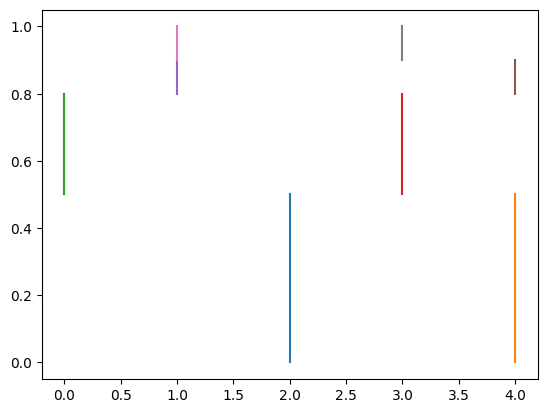

0 | Sample(probability=np.float64(0.4), ids=frozenset({2, 3}))
1 | Sample(probability=np.float64(0.2), ids=frozenset({1, 4}))
2 | Sample(probability=np.float64(0.3), ids=frozenset({0, 4}))
3 | Sample(probability=np.float64(0.1), ids=frozenset({2, 4}))


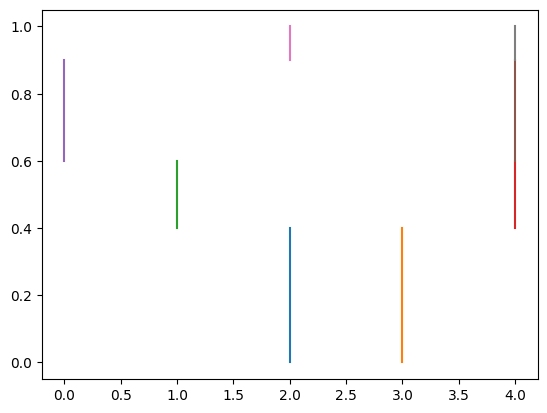

In [ ]:
inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
AsDesign = Design(inclusions=inclusions)
print("Index | Sample")
print("----------------")
for i, sample in enumerate(AsDesign):
    print(f"{i:5d} | {sample}")
AsDesign.show()



inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
perm = np.random.permutation(len(inclusions))
shuffled = inclusions[perm]
AsDesign = Design(inclusions=shuffled, perm=perm)
for i, sample in enumerate(AsDesign):
    print(f"{i} | {sample}")
AsDesign.show()